In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
survey = pd.read_csv('python_psf_external_18.csv')
survey = survey.drop('Unnamed: 0', axis=1)
survey.columns = [c.lower() for c in survey.columns]

C:\Users\secsi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (168,197) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
survey.shape

(19835, 283)

In [4]:
survey.sample()

,is python the main language you use for your current projects?,none:what other language(s) do you use?,java:what other language(s) do you use?,javascript:what other language(s) do you use?,c/c++:what other language(s) do you use?,php:what other language(s) do you use?,c#:what other language(s) do you use?,ruby:what other language(s) do you use?,bash / shell:what other language(s) do you use?,objective-c:what other language(s) do you use?,...,technical support:which of the following best describes your job role(s)?,data analyst:which of the following best describes your job role(s)?,business analyst:which of the following best describes your job role(s)?,team lead:which of the following best describes your job role(s)?,product manager:which of the following best describes your job role(s)?,cio / ceo / cto:which of the following best describes your job role(s)?,systems analyst:which of the following best describes your job role(s)?,other write in::which of the following best describes your job role(s)?,could you tell us your age range?,what country do you live in?
1153,"No, I don’t use Python for my current projects",NaN,Java,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,Data analyst,Business analyst,NaN,NaN,NaN,NaN,NaN,17 or younger,Iceland


In [5]:
survey.columns

Index(['is python the main language you use for your current projects?',
       'none:what other language(s) do you use?',
       'java:what other language(s) do you use?',
       'javascript:what other language(s) do you use?',
       'c/c++:what other language(s) do you use?',
       'php:what other language(s) do you use?',
       'c#:what other language(s) do you use?',
       'ruby:what other language(s) do you use?',
       'bash / shell:what other language(s) do you use?',
       'objective-c:what other language(s) do you use?',
       ...
       'technical support:which of the following best describes your job role(s)?',
       'data analyst:which of the following best describes your job role(s)?',
       'business analyst:which of the following best describes your job role(s)?',
       'team lead:which of the following best describes your job role(s)?',
       'product manager:which of the following best describes your job role(s)?',
       'cio / ceo / cto:which of the follow

In [6]:
def find_cols(kws, df=survey):
    '''找到 df 中含有 kws 的列'''
    return [item for item in df.columns if all([w in item for w in kws])]

In [7]:
find_cols(df=survey, kws=['python', 'version'])

['which version of python do you use the most?',
 'which version of python 2 do you use the most?',
 'which version of python 3 do you use the most?',
 'i dont update:what do you typically use to upgrade your python version?',
 'somebody else manages python updates for me:what do you typically use to upgrade your python version?',
 'python.org:what do you typically use to upgrade your python version?',
 'build from source:what do you typically use to upgrade your python version?',
 'automatic upgrade via cloud provider:what do you typically use to upgrade your python version?',
 'enthought:what do you typically use to upgrade your python version?',
 'anaconda:what do you typically use to upgrade your python version?',
 'activepython:what do you typically use to upgrade your python version?',
 'intel distribution for python:what do you typically use to upgrade your python version?',
 'os-provided python (via apt-get, yum, homebrew, etc.):what do you typically use to upgrade your python 

## 2018 年的问题

- 使用 Python 2 和 Python 3 的开发者的比例？
- 做数据分析和机器学习的人中分别有多少人使用的是 Python 3？
- 常用框架中使用 Python 2 和 Python 3 的比例？
- 做数据分析和机器学习的人常用的框架？
- 公司规模大小和是否使用 Python 3 的关系？
- 开发者年龄和是否使用 Python 3 的关系？
- 使用 Python 3 和 Python 2 的开发者的国别分布？
- 开发者中使用 IDE 的情况？

### 使用 Python 2 和 Python 3 的开发者比例

In [8]:
python_version = survey['which version of python do you use the most?']
python_version.describe()

count        18431
unique           2
top       Python 3
freq         15446
Name: which version of python do you use the most?, dtype: object

In [9]:
python_version.value_counts(normalize=True, dropna=False)

Python 3    0.778724
Python 2    0.150492
NaN         0.070784
Name: which version of python do you use the most?, dtype: float64

In [10]:
python_version.value_counts(normalize=True, dropna=True)

Python 3    0.838045
Python 2    0.161955
Name: which version of python do you use the most?, dtype: float64

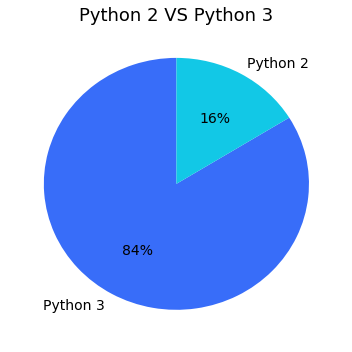

In [11]:
python_version.value_counts(normalize=True, dropna=True).plot(
    kind="pie",
    figsize=(5, 5),
    startangle=90,
    autopct="%.0f%%",
    fontsize=14,
    colors=sns.color_palette("rainbow")[:2],
)
plt.title("Python 2 VS Python 3", fontsize=18)
plt.ylabel("")
plt.tight_layout()
plt.savefig("python-version.png")

Python 3 的比重已经达到了 84% ！去年还是才 75%。

### 做数据分析和机器学习的人中分别有多少人使用的是 Python 3

In [12]:
find_cols(['machine learning'])

['machine learning:what do you use python for?',
 'machine learning:to what extent are you involvedin the following activities?']

In [13]:
find_cols(['data analysis'])

['data analysis:what do you use python for?',
 'data analysis:to what extent are you involvedin the following activities?']

In [14]:
version_col = 'which version of python do you use the most?'

In [15]:
python_da_ml = survey[
    [
        version_col,
        "machine learning:what do you use python for?",
        "data analysis:what do you use python for?",
    ]
]

In [19]:
python_da_ml.head()

,which version of python do you use the most?,machine learning:what do you use python for?,data analysis:what do you use python for?
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [20]:
python_da = pd.crosstab(
    python_da_ml[version_col],
    python_da_ml["data analysis:what do you use python for?"],
    normalize=True,
)

In [21]:
python_da

data analysis:what do you use python for?,Data analysis
which version of python do you use the most?,
Python 2,0.140556
Python 3,0.859444


In [28]:
python_ml = pd.crosstab(
    python_da_ml[version_col],
    python_da_ml["machine learning:what do you use python for?"],
    normalize=True,
)

In [29]:
python_ml

machine learning:what do you use python for?,Machine learning
which version of python do you use the most?,
Python 2,0.109697
Python 3,0.890303


In [32]:
pd.crosstab(
    python_da_ml[version_col],
    columns=[python_da_ml["machine learning:what do you use python for?"], python_da_ml["data analysis:what do you use python for?"]],
    normalize=True,
)

machine learning:what do you use python for?,Machine learning
data analysis:what do you use python for?,Data analysis
which version of python do you use the most?,
Python 2,0.103596
Python 3,0.896404


In [35]:
pd.concat([python_da, python_ml], axis=1)

,Data analysis,Machine learning
which version of python do you use the most?,,
Python 2,0.140556,0.109697
Python 3,0.859444,0.890303


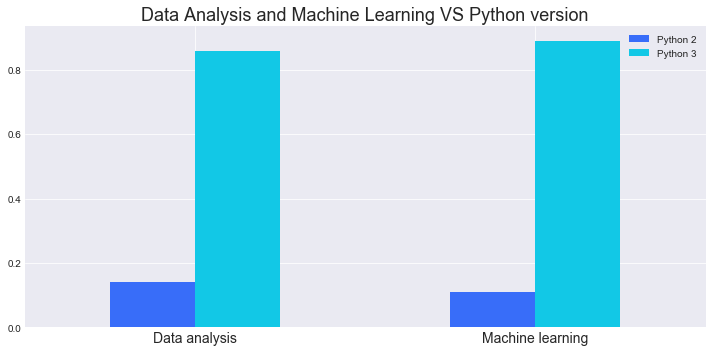

In [38]:
pd.concat([python_da, python_ml], axis=1).T.plot(kind='bar', figsize=(10, 5), color=sns.color_palette('rainbow'))
plt.xticks(rotation=0, fontsize=14)
plt.title('Data Analysis and Machine Learning VS Python version', fontsize=18)
plt.legend(title=None)
plt.tight_layout()
plt.savefig('data-analysis-machine-learning-vs-python-version.png')

这两类人群中使用 Python 的比例相比去年都有来了很大的提高，其中数据分析更是达到了 10%。

### 常用框架中使用 Python 2 和 Python 3 的比例？

In [47]:
cols = find_cols(['what', 'framework', 'use', 'python'])
cols

['none:what web frameworks / libraries do you use in addition to python?',
 'django:what web frameworks / libraries do you use in addition to python?',
 'turbogears:what web frameworks / libraries do you use in addition to python?',
 'web2py:what web frameworks / libraries do you use in addition to python?',
 'bottle:what web frameworks / libraries do you use in addition to python?',
 'cherrypy:what web frameworks / libraries do you use in addition to python?',
 'flask:what web frameworks / libraries do you use in addition to python?',
 'hug:what web frameworks / libraries do you use in addition to python?',
 'pyramid:what web frameworks / libraries do you use in addition to python?',
 'tornado:what web frameworks / libraries do you use in addition to python?',
 'falcon:what web frameworks / libraries do you use in addition to python?',
 'other  write in::what web frameworks / libraries do you use in addition to python?',
 'none:what data science framework(s) do you use in addition to 

In [48]:
frameworks = survey[cols[1:]]
frameworks.head()

,django:what web frameworks / libraries do you use in addition to python?,turbogears:what web frameworks / libraries do you use in addition to python?,web2py:what web frameworks / libraries do you use in addition to python?,bottle:what web frameworks / libraries do you use in addition to python?,cherrypy:what web frameworks / libraries do you use in addition to python?,flask:what web frameworks / libraries do you use in addition to python?,hug:what web frameworks / libraries do you use in addition to python?,pyramid:what web frameworks / libraries do you use in addition to python?,tornado:what web frameworks / libraries do you use in addition to python?,falcon:what web frameworks / libraries do you use in addition to python?,...,pandas:what data science framework(s) do you use in addition to python?,matplotlib:what data science framework(s) do you use in addition to python?,seaborn:what data science framework(s) do you use in addition to python?,scikit-learn:what data science framework(s) do you use in addition to python?,keras:what data science framework(s) do you use in addition to python?,tensorflow:what data science framework(s) do you use in addition to python?,theano:what data science framework(s) do you use in addition to python?,nltk:what data science framework(s) do you use in addition to python?,gensim:what data science framework(s) do you use in addition to python?,other - write in::what data science framework(s) do you use in addition to python?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


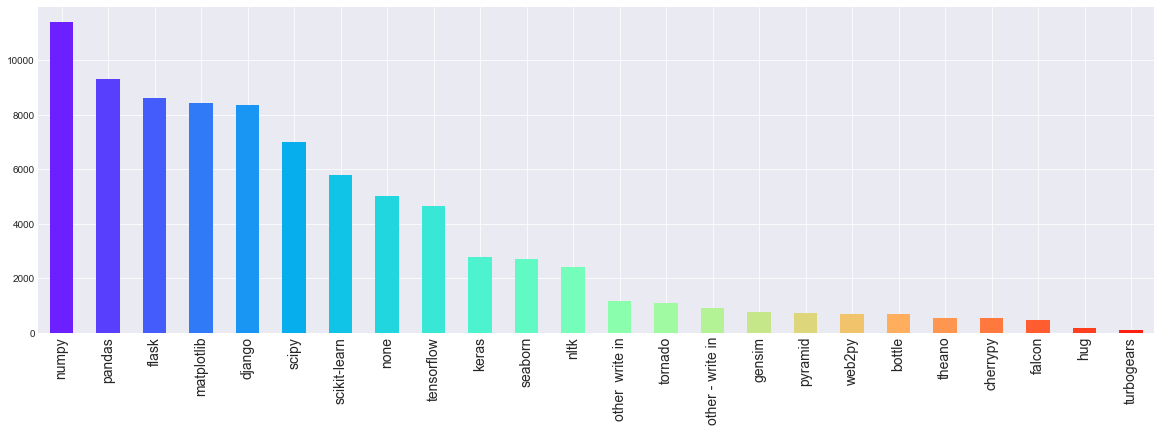

In [51]:
count_df = frameworks.count().sort_values(ascending=False)
count_df.index = [item.split(':')[0] for item in count_df.index]

count_df.plot(kind='bar', color=sns.color_palette('rainbow', frameworks.shape[1]))
plt.xticks(fontsize=14);

In [54]:
frameworks.count().sort_values(ascending=False)

numpy:what data science framework(s) do you use in addition to python?                11384
pandas:what data science framework(s) do you use in addition to python?                9314
flask:what web frameworks / libraries do you use in addition to python?                8615
matplotlib:what data science framework(s) do you use in addition to python?            8434
django:what web frameworks / libraries do you use in addition to python?               8354
scipy:what data science framework(s) do you use in addition to python?                 6989
scikit-learn:what data science framework(s) do you use in addition to python?          5787
none:what data science framework(s) do you use in addition to python?                  5018
tensorflow:what data science framework(s) do you use in addition to python?            4653
keras:what data science framework(s) do you use in addition to python?                 2776
seaborn:what data science framework(s) do you use in addition to python?        

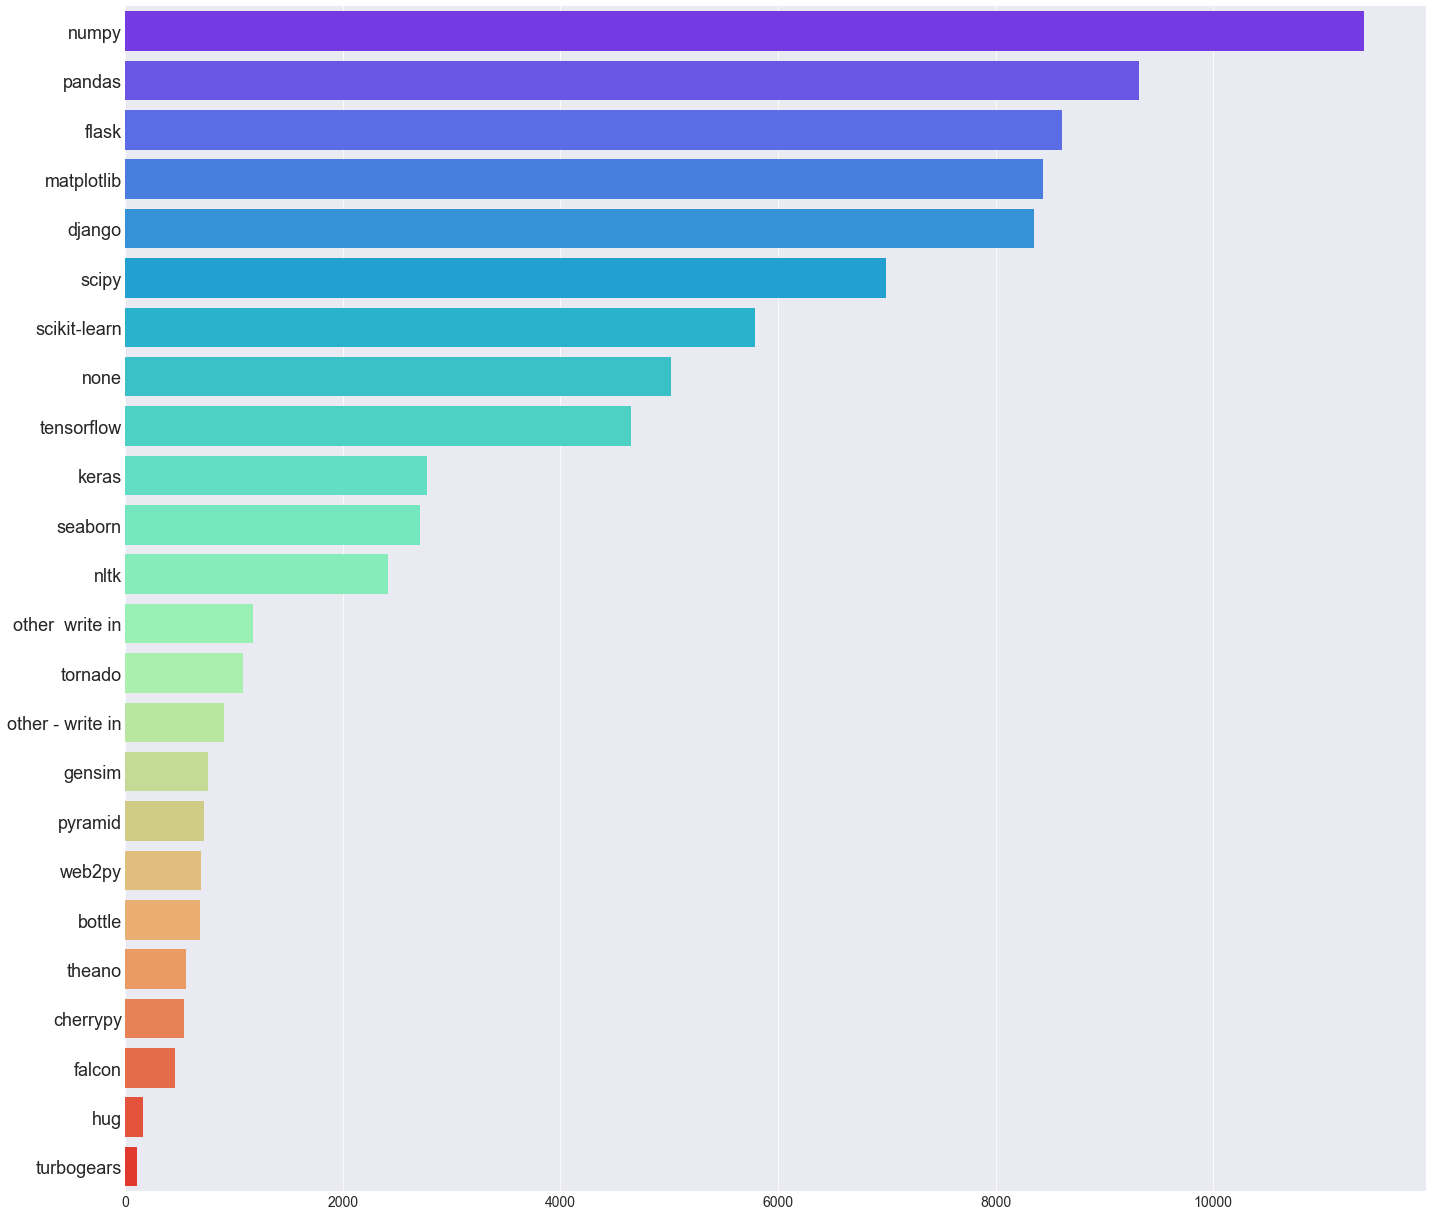

In [52]:
values = frameworks.count().sort_values(ascending=False).values
labels = [item.split(':')[0] for item in frameworks.count().sort_values(ascending=False).index]

plt.figure(figsize=(20, 17))
sns.barplot(x=values, y=labels, orient='h', palette=sns.color_palette("rainbow", 24))
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('frameworks.png')